### PREDICTING THE DEMAND FOR WATER RESOURCE OF CITIES IN TELANGANA

#### BY: Nandhini and Niteesh Kumar

The dataset on water demand and related infrastructure variables directly addresses critical aspects of city resource management. We have taken cross sectional data of 59 cities in Telangana to predict water demand. By predicting water demand and assessing factors like treatment facility capacity, distribution network efficiency, and service connections, the dataset supports informed decision-making for urban planners and policymakers. It enables proactive allocation of resources, infrastructure improvements, and maintenance planning to ensure reliable water supply to residents and businesses. This holistic approach not only enhances operational efficiency but also strengthens cities' resilience to environmental changes and population growth, promoting sustainable development and quality of life for urban populations.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
data=pd.read_csv("water-supply.csv")
data.head()

,ULB_name,Source_of_water,Water_Demand_(MLD),Water_Treatment_facility_(MLD),Utilisation_of_treatment_facility,Storage_Capacity_(MLD),Protected_water_supply_reservoirs,Total_installed_capacity_of_protected_water_supply_(MGD),House_service_connections_(No's),Public_stand_posts,...,Power_bores_(No's),Hand_bores_(No's),Water_Connections_(No's),Residential_Connections,Commercial_Connections,Metered_Connections,Covered_Population_(%),Unserved_population_(%),No_of_Hours_supply_in_a_day,Cost_Recovery_of_Maintenance
0,Andol-Jogipet,"Etigadda,Sathyasai,Vonappuram,Borewells",2.92,0.0,0.0,3.30,1,0,1375,2,...,110,4,1375,1230,145,0,80.0,5.0,1,495000
1,Armoor,surface and ground water,7.00,11.5,5.5,3.50,1,22,10358,254,...,192,56,10358,10358,0,0,98.2,1.8,6,0
2,Atchampet,Bore wells,3.00,0.6,4.0,0.50,0,1,3450,400,...,92,56,3450,3450,0,0,90.0,10.0,0,24
3,Badangpet,HMWS&SB BORE WELLS,14.25,0.0,0.0,7.00,0,0,14020,0,...,370,30,14020,14020,0,0,54.7,45.3,1,16824000
4,Badepally,"Bore motors,Raman paad",1.82,0.0,0.0,1.82,0,0,4548,0,...,110,12,4548,4548,0,0,75.0,25.0,1,0


In [2]:
data.drop('Source_of_water',axis=1,inplace = True)

In [3]:
from sklearn.model_selection import train_test_split
x= data.drop(['ULB_name','Water_Demand_(MLD)'],axis=1)
y= data['Water_Demand_(MLD)']

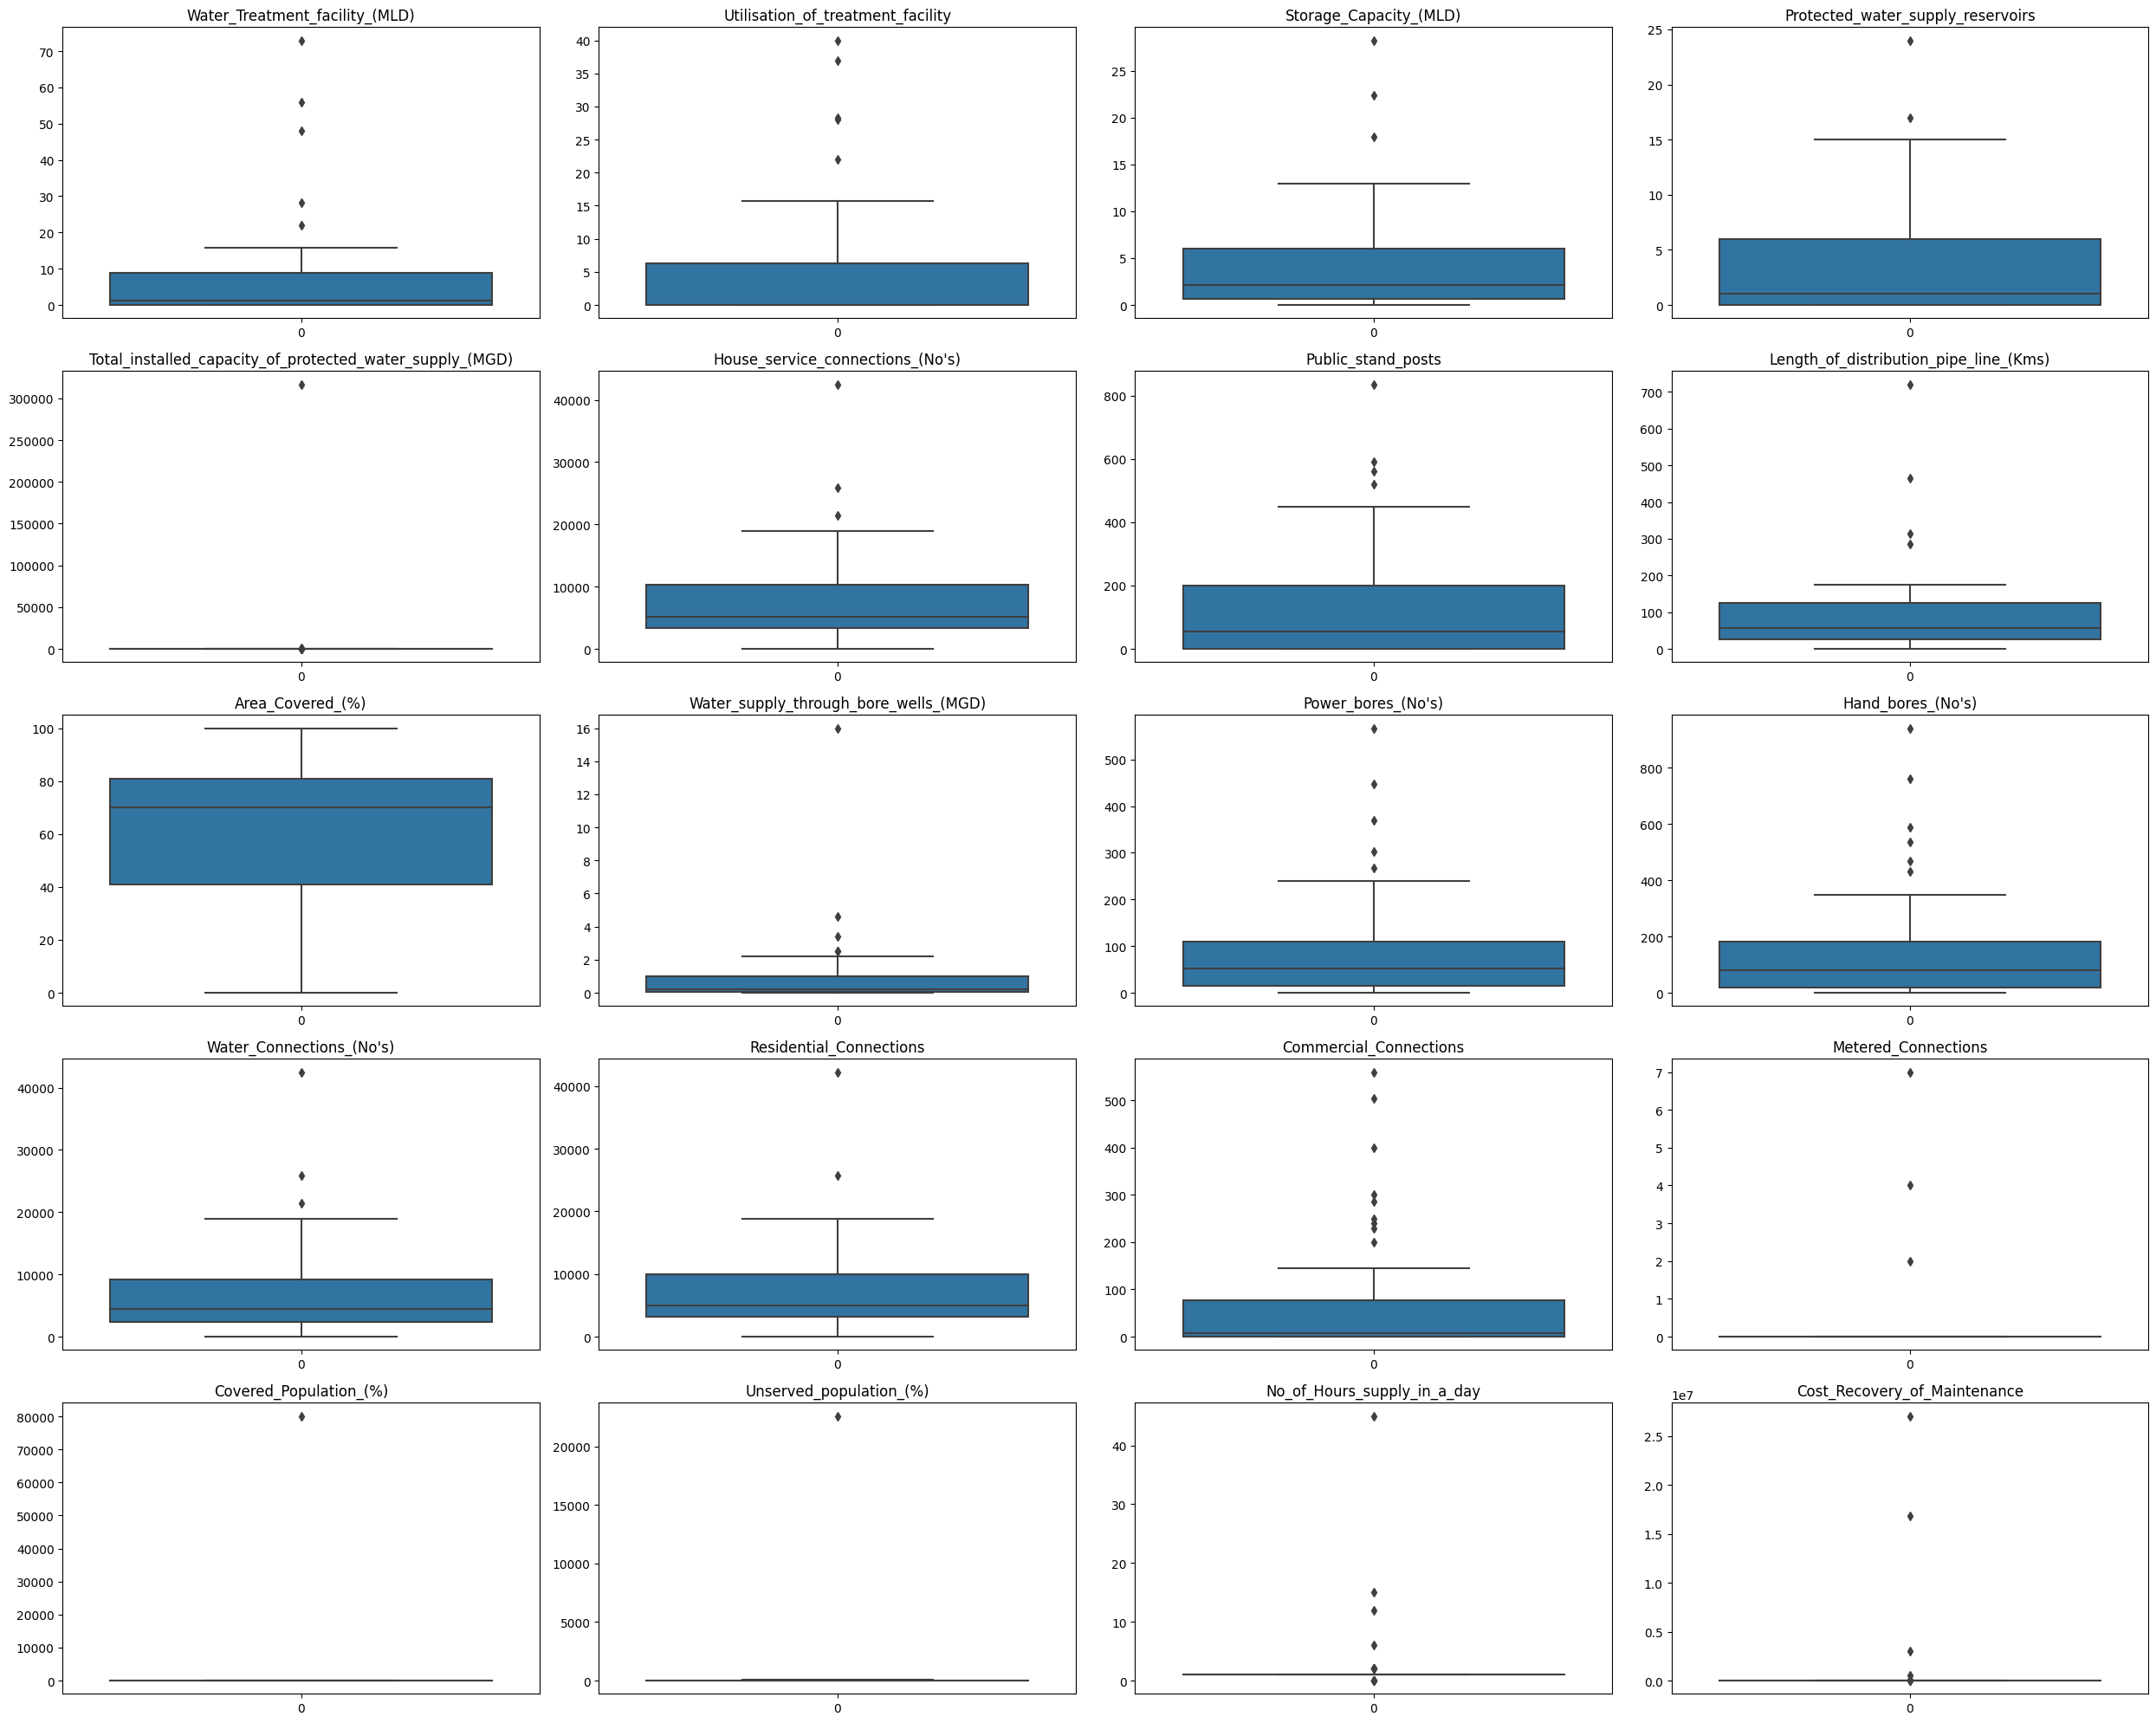

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 20)) 

for idx, column in enumerate(x.columns):
    plt.subplot(5, 4, idx + 1) 
    sns.boxplot(data=x[column])
    plt.title(column)

plt.tight_layout()
plt.show() 

We can find that most of the variables are prone to outliers. It is evident that the outliers of all the variables lie above the upper cap (limit) of the boxplot. Thus, the interquartile method (IQR), as shown in the Equation (1), is used to detect and replace the outliers with the capped value based on the upper limit.

Q1 – 1.5*IQR to Q3 + 1.5*IQR…………. (1)

Where Q1= 25th percentile, Q3= 75th percentile and IQR= Q3-Q1

Q1-1.5*IQR= Lower Limit

Q3+1.5*IQR= Upper Limit

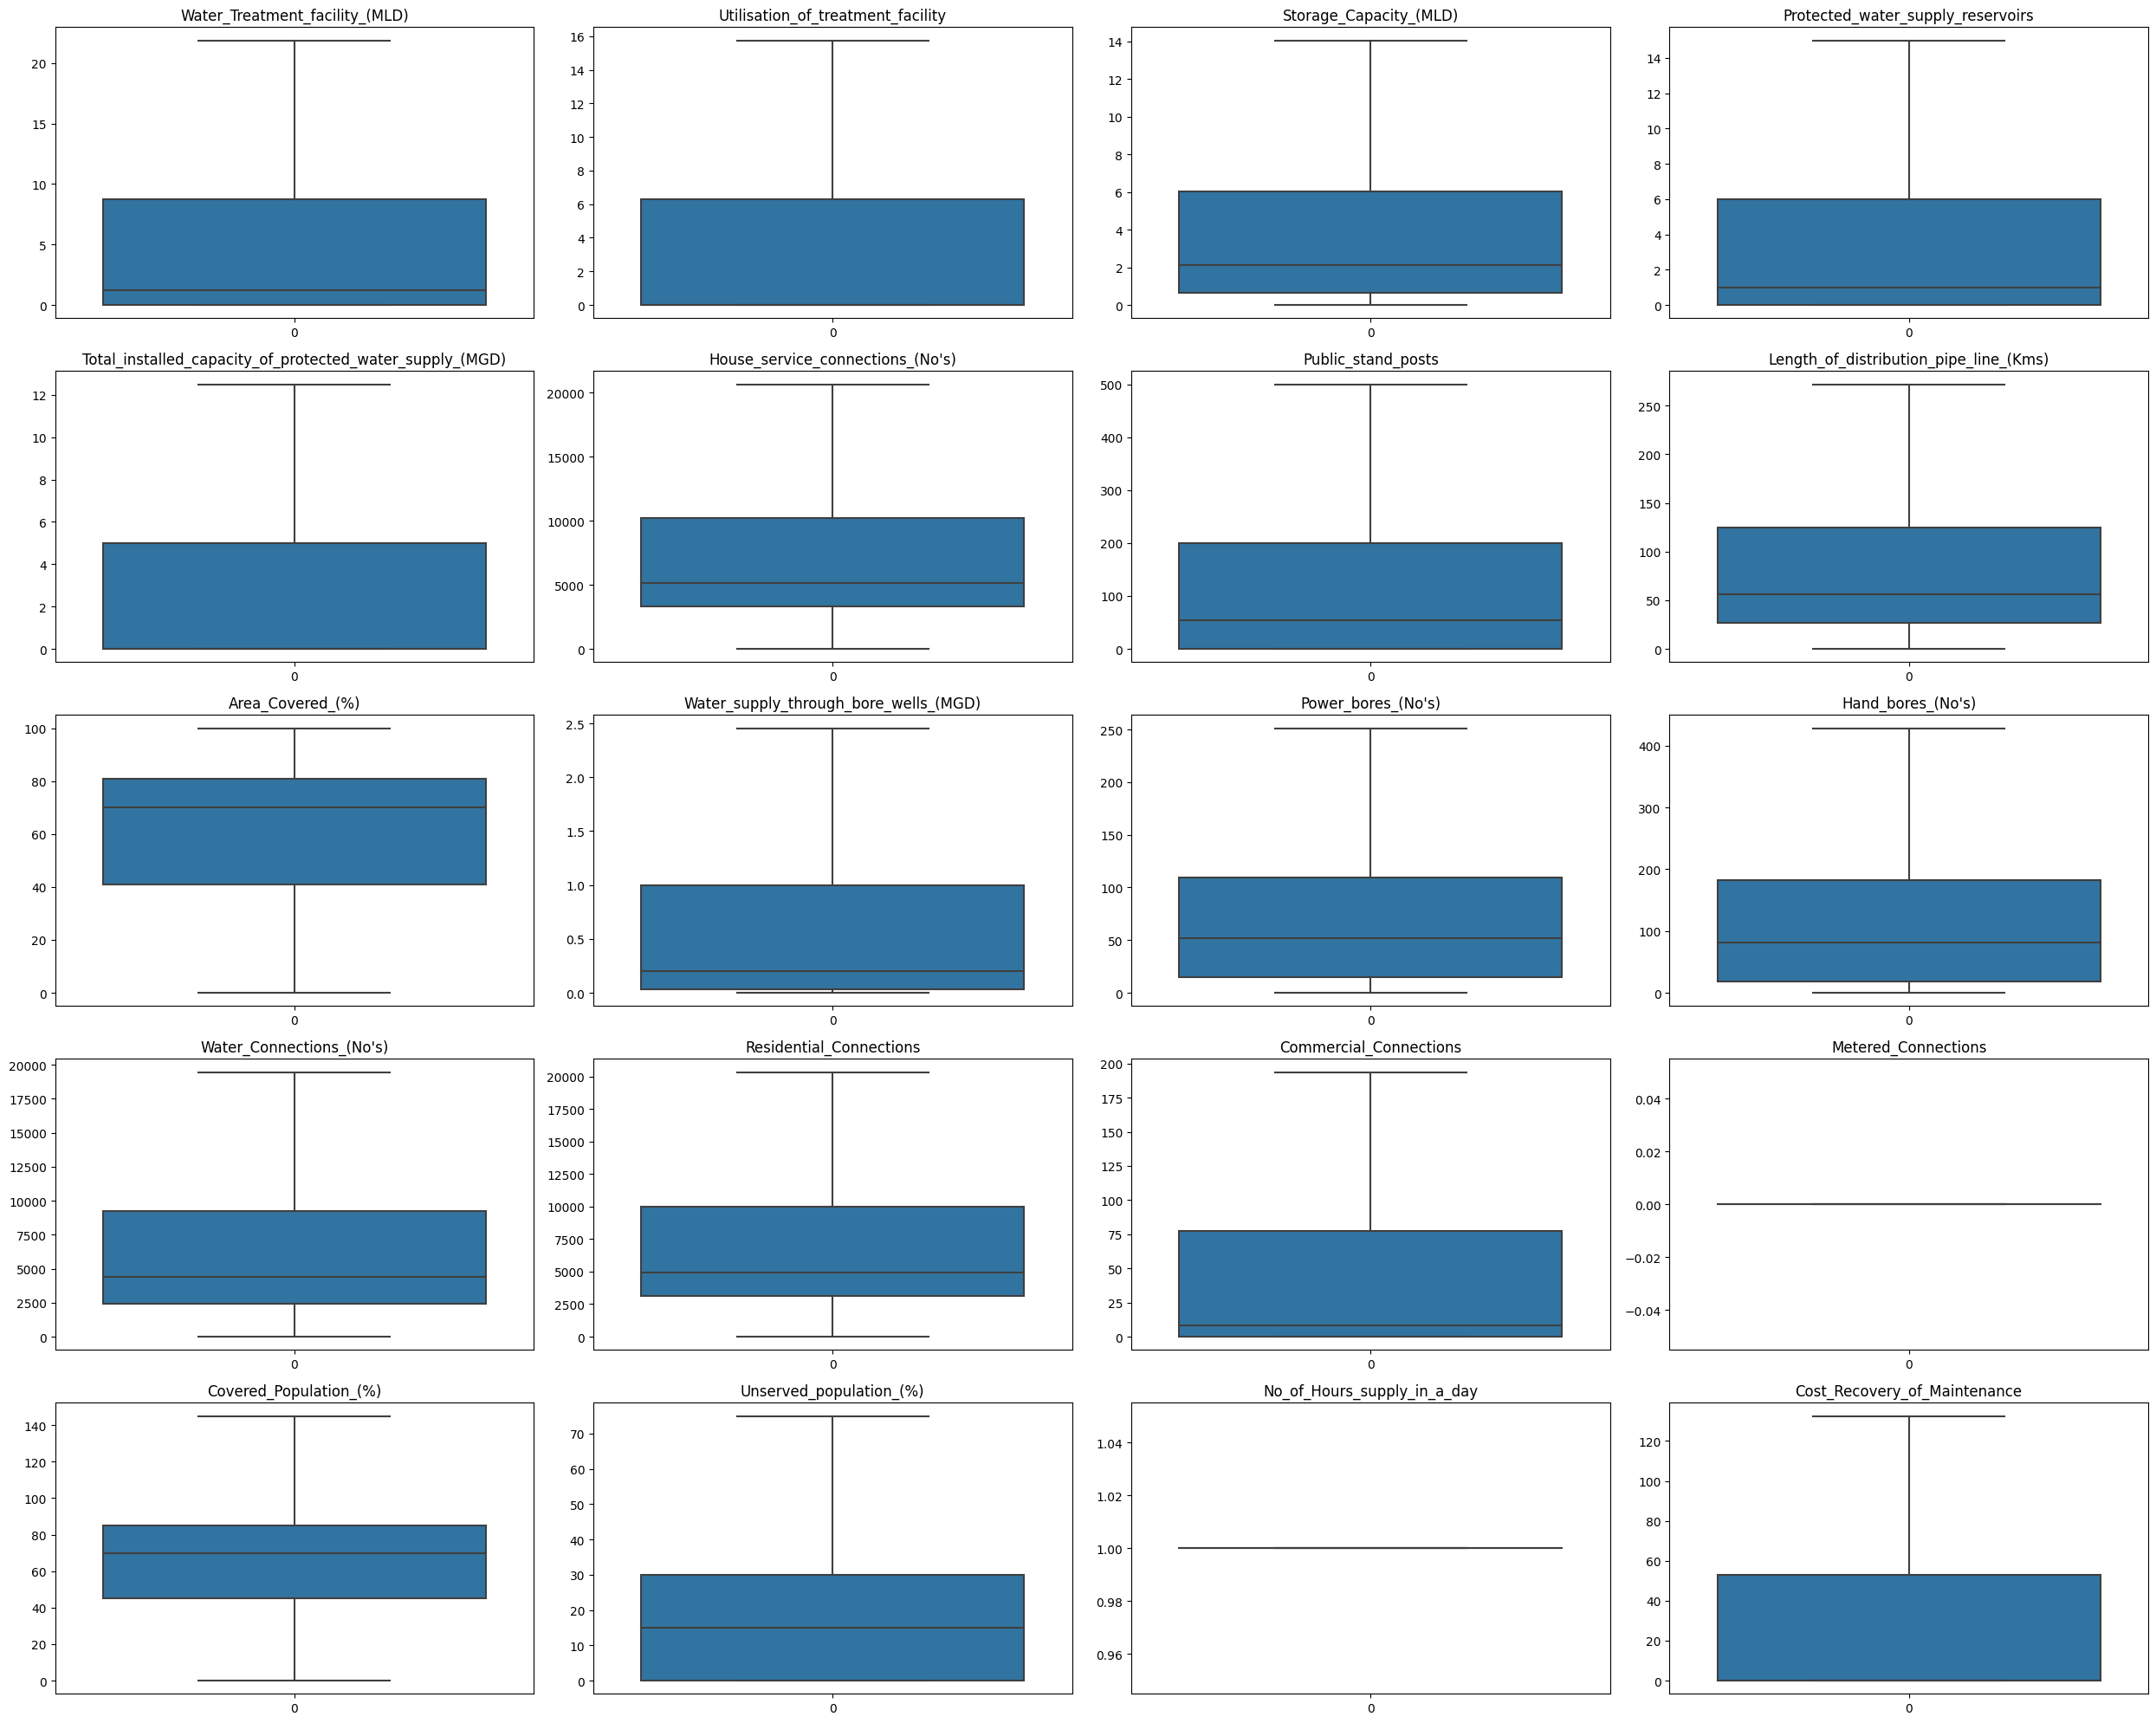

In [5]:
plt.figure(figsize=(25, 20)) 

for idx, column in enumerate(x.columns):
    Q1 = x[column].quantile(0.25)
    Q3 = x[column].quantile(0.75)
    IQR = Q3 - Q1
    
    limit = (x[column] < Q1 - 1.5 * IQR) | (x[column] > Q3 + 1.5 * IQR)
    
    x.loc[limit, column] = Q3+1.5*IQR 
    
    plt.subplot(5, 4, idx + 1) 
    sns.boxplot(data=x[column])
    plt.title(column)

plt.tight_layout()
plt.show() 

### ISOLATION FOREST ALGORITHM

In [6]:
from sklearn.ensemble import IsolationForest

# Train the Isolation Forest model
model = IsolationForest(contamination=0.01)
model.fit(x)

# Predict anomalies
data['anomaly'] = model.predict(x)

In [7]:
data

,ULB_name,Water_Demand_(MLD),Water_Treatment_facility_(MLD),Utilisation_of_treatment_facility,Storage_Capacity_(MLD),Protected_water_supply_reservoirs,Total_installed_capacity_of_protected_water_supply_(MGD),House_service_connections_(No's),Public_stand_posts,Length_of_distribution_pipe_line_(Kms),...,Hand_bores_(No's),Water_Connections_(No's),Residential_Connections,Commercial_Connections,Metered_Connections,Covered_Population_(%),Unserved_population_(%),No_of_Hours_supply_in_a_day,Cost_Recovery_of_Maintenance,anomaly
0,Andol-Jogipet,2.92,0.00,0.00,3.30,1,0,1375,2,28.50,...,4,1375,1230,145,0,80.00,5.00,1,495000,1
1,Armoor,7.00,11.50,5.50,3.50,1,22,10358,254,103.00,...,56,10358,10358,0,0,98.20,1.80,6,0,1
2,Atchampet,3.00,0.60,4.00,0.50,0,1,3450,400,18.00,...,56,3450,3450,0,0,90.00,10.00,0,24,1
3,Badangpet,14.25,0.00,0.00,7.00,0,0,14020,0,163.14,...,30,14020,14020,0,0,54.70,45.30,1,16824000,1
4,Badepally,1.82,0.00,0.00,1.82,0,0,4548,0,44.42,...,12,4548,4548,0,0,75.00,25.00,1,0,1
5,Bellampalle,7.00,0.00,0.00,6.60,2,2,2500,200,30.00,...,535,2500,2500,0,0,80.00,20.00,12,0,1
6,Bhainsa,8.00,3.75,3.75,1.50,2,5,3200,45,36.00,...,72,3200,3200,0,0,0.00,0.00,15,3000000,1
7,Bhupalapally,0.00,0.00,0.00,0.00,0,0,0,0,0.00,...,120,3060,2500,560,0,0.00,0.00,1,0,1
8,Bodhan,10.00,12.22,12.22,12.22,8,0,10421,123,86.00,...,25,10421,10396,25,0,85.00,15.00,1,0,1
9,Boduppal,15.00,0.00,0.00,4.10,0,4,10700,21,25.00,...,4,0,10700,0,0,60.00,40.00,1,0,1


In [8]:
anomalies = data[data['anomaly']==-1]
anomalies

,ULB_name,Water_Demand_(MLD),Water_Treatment_facility_(MLD),Utilisation_of_treatment_facility,Storage_Capacity_(MLD),Protected_water_supply_reservoirs,Total_installed_capacity_of_protected_water_supply_(MGD),House_service_connections_(No's),Public_stand_posts,Length_of_distribution_pipe_line_(Kms),...,Hand_bores_(No's),Water_Connections_(No's),Residential_Connections,Commercial_Connections,Metered_Connections,Covered_Population_(%),Unserved_population_(%),No_of_Hours_supply_in_a_day,Cost_Recovery_of_Maintenance,anomaly
26,Karimnagar,60.38,48.0,37.0,17.9,15,10,42500,591,315.0,...,941,42500,42258,240,2,80.0,22.0,1,390,-1


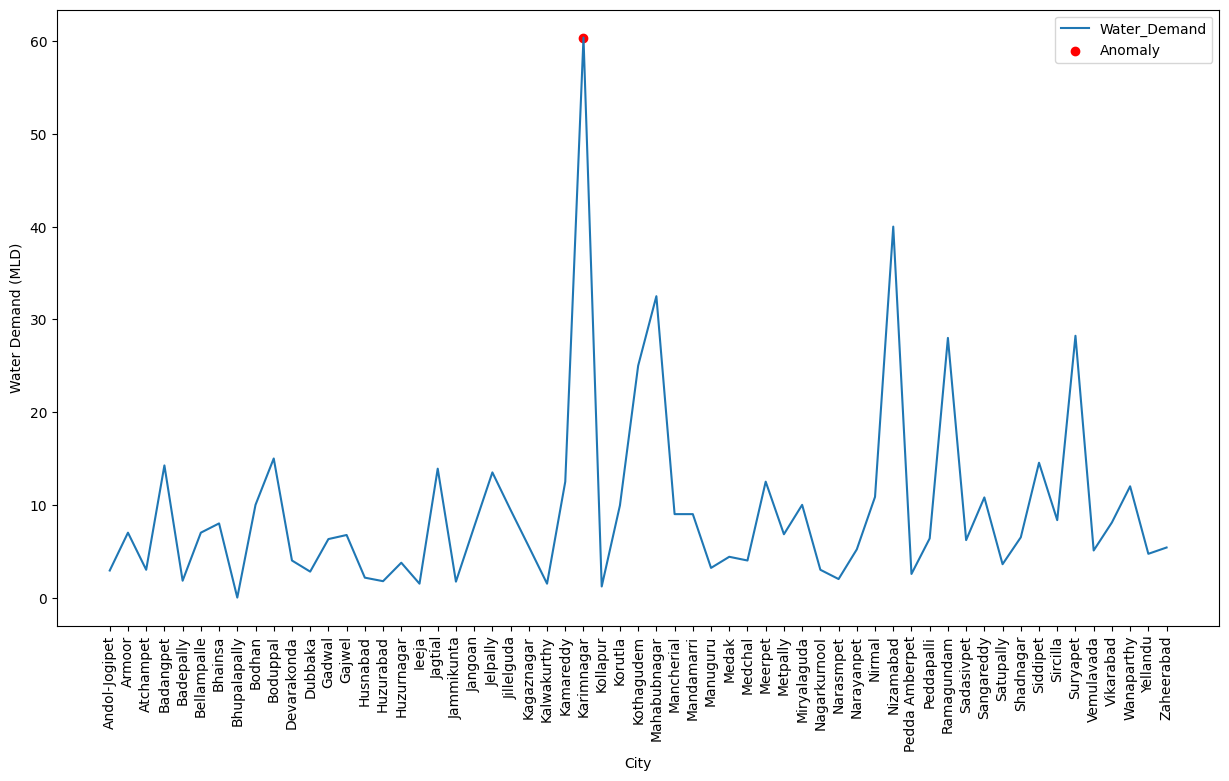

In [9]:
plt.figure(figsize=(15, 8))
plt.plot(data['ULB_name'], data['Water_Demand_(MLD)'], label='Water_Demand')
plt.scatter(anomalies.index, anomalies['Water_Demand_(MLD)'], color='red', label='Anomaly')
plt.xlabel('City')
plt.ylabel('Water Demand (MLD)')
plt.xticks(rotation=90)
plt.legend()
plt.show()


Isolation forest algorithm detects anomalies in water and visualizes the detected anomalies on a plot, helping identify cities with unusual water demand patterns after outliers have been capped. We can find that there in only 1 anomaly pertaining to water demand in Karimnagar. We tend to omit as it is evident from the data that the city has a huge household population and they have installed bores too. 

In [10]:
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=60)
len(x_train),len(x_test),len(y_train),len(y_test)

(47, 12, 47, 12)

### MODEL DEPLOYMENT

We are using R-squared and Mean Squared Error as a metric to evaluate models’ performance. 

#### LINEAR REGRESSION

In [11]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train,y_train)
y_pred_reg= reg.predict(x_test)

In [12]:
from sklearn.metrics import r2_score

In [13]:
r2_reg = r2_score(y_test,y_pred_reg)
r2_reg

0.5149551315963681

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
mse_reg = mean_squared_error(y_test,y_pred_reg)
mse_reg

56.364334432454456

#### RANDOM FOREST REGRESSOR

In [16]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(100,criterion='poisson')
rf.fit(x_train,y_train)
y_pred_rf= rf.predict(x_test)

In [17]:
r2_rf = r2_score(y_test,y_pred_rf)
r2_rf

0.925367300511816

In [18]:
mse_rf = mean_squared_error(y_test,y_pred_rf)
mse_rf

8.67264599127419

#### SUPPORT VECTOR REGRESSOR

In [19]:
from sklearn.svm import SVR
svr = SVR(kernel = 'poly')
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)

In [20]:
r2_svm = r2_score(y_test,y_pred_svr)
r2_svm

0.8822817660969038

In [21]:
mse_svm = mean_squared_error(y_test,y_pred_svr)
mse_svm

13.679373469818017

In [22]:
result = pd.DataFrame({'Model':('Linear Regression','Random Forest', 'SVM'),
                       'R2 Score':(r2_reg,r2_rf,r2_svm),
                      'Mse':(mse_reg,mse_rf,mse_svm)}).set_index('Model').sort_values('R2 Score',ascending=False)
result

,R2 Score,Mse
Model,,
Random Forest,0.925367,8.672646
SVM,0.882282,13.679373
Linear Regression,0.514955,56.364334


Random Forest provides the highest R-squared and lowest Mean Squared Error. Thus, usage of random forest as an ML Algorithm enables accurate prediction of water demand which in turn enhances operational efficiency and resource management in cities. 